# 需要安裝的套件
1. ### jieba
2. ### numpy
3. ### scikit-learn
4. ### tensorflow 2.1.0版
5. ### matplotlib

# 將對話文本透過結巴進行斷詞
* #### 斷詞完後的文本會存在對話文本資料夾內，檔名Happy_segment.txt。

In [17]:
import jieba
import os

# 为语料做分词处理
def word_segment():
    # 打开语料文本
    inputFile_NoSegment = open(os.getcwd() + '/對話文本/Happy.txt', 'rb')
    outputFile_Segment = open(os.getcwd() + '/對話文本/Happy_segment.txt',
                              'w', encoding='utf-8')

    # 读取语料文本中的每一行文字
    lines = inputFile_NoSegment.readlines()

    # 为每一行文字分词
    for i in range(len(lines)):
        line = lines[i]
        if line:
            line = line.strip()
            seg_list = jieba.cut(line)

            segments = ''
            for word in seg_list:
                segments = segments + ' ' + word
            segments += '\n'
            segments = segments.lstrip()

            # 将分词后的语句，写进文件中
            outputFile_Segment.write(segments)

    inputFile_NoSegment.close()
    outputFile_Segment.close()

word_segment()

# 文本資料前處理

> ## 對話文本介紹：
>> #### 1. 文本採用一問一答的設計，奇數句為問句，偶數句為答句。
>> #### 2. 可參考<font color=#00ffff>對話文本/Happy.txt</font>檔案格式，進行對話文本的撰寫。
>> #### 3. 文本須先進行斷詞處理才可進行後續的操作。
> ## 模型輸入及輸出介紹：
>> ![seq2seq架構圖](seq2seq架構圖.png)
>> #### 1. 在訓練階段上，模型的encoder端為斷詞後文本的問句，decoder端為斷詞後文本的答句並在前後加上<font color=#ff0000>START</font>及<font color=#ff0000>END</font>表示句子的開始和結束。

In [18]:
import os

# 讀入斷詞後的文本
text_Segment = open(os.getcwd() + '/對話文本/Happy_segment.txt',
                    'r', encoding='utf-8')
text_Segment_list = text_Segment.readlines()
text_Segment.close()

# 移除文本內的'\n'
text_Segment_list = [n.rstrip() for n in text_Segment_list]

print('對話文本筆數：', len(text_Segment_list))
print('對話文本內容：', text_Segment_list)

對話文本筆數： 2526
對話文本內容： ['早安', '早安 昨天晚上 睡得 好 嗎', '睡得 很 好', '真是 不錯 那 趕快 去 享用 美味 的 早餐 吧', '早安', '早安 昨天晚上 睡得 好 嗎', '睡得 好 啊', '真棒 需要 去 外面 走走 做 早晨 運動 嗎', '好 啊 感覺 不錯', '那記 得 不要 做 太 激烈 的 運動 唷', '早安', '早安 昨天晚上 睡得 好 嗎', '睡得 不錯', '真是 開心 吃 好吃 得 早餐 迎接 美好 的 早晨 吧', '早安', '早安 昨天晚上 睡得 好 嗎', '睡得還 可以', '沒關 西 中午 再補 睡 一會兒 精神 會 好 很多', '早安', '早安 昨天晚上 睡得 好 嗎', '睡得 還行', '下午 可以 出去 活動 身體 可以 有效 幫助 睡眠 品質 唷', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天 要 去 找 朋友 下棋', '聽起 來 很 有趣 要 玩 得 愉快 唷', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天 要 去 公園 散步', '不錯 呀 要 注意 今天 的 天氣 狀況 唷', '早', '早安 今天 有 安排 什麼 活動 嗎', '想 去 公園 散步', '活動 筋骨 有益 身體 健康 要 注意 天氣 的 狀況 唷', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天 要 去 找 朋友 聊天', '好 的 保持 愉悅 心情 跟 朋友 聊天 吧', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天 有 老人 共餐 的 活動', '聽起 來 很 有趣 要 玩 得 愉快 唷', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天下午 要 參加讀 經班', '幫 你 開 啟定 時 提醒 的 服務 如果 不 需要 這項 功能 可以 說 取消', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天下午 要 上 插花 課', '好 的 幫 你 開 啟定 時 提醒 的 服務 如果 不 需要 這項 功能 可以 說 取消', '早', '早安 今天 有 安排 什麼 活動 嗎', '今天下午 要 上 韻律 課', '好 的 幫 你 開 啟定 時 提醒 的 服務 如果 不 需要 這項 功能 可以 說 

In [19]:
from collections import Counter

MAX_INPUT_SEQ_LENGTH = 10 # encoder端輸入序列的長度
MAX_TARGET_SEQ_LENGTH = 15 # decoder端輸出序列的長度
MAX_INPUT_VOCAB_SIZE = 1500 # encoder端的所有輸入(文本內的所有問句)的總詞數 (不重複)，若總數量超過設定值，則將多餘出現頻率較低的詞捨去。
MAX_TARGET_VOCAB_SIZE = 1500 # decoder端的所有輸出(文本內的所有答句)的總詞數 (不重複)，若總數量超過設定值，則將多餘出現頻率較低的詞捨去。


def fit_text(X, Y, input_seq_max_length=None, target_seq_max_length=None):
    if input_seq_max_length is None:
        input_seq_max_length = MAX_INPUT_SEQ_LENGTH
    if target_seq_max_length is None:
        target_seq_max_length = MAX_TARGET_SEQ_LENGTH
    input_counter = Counter()
    target_counter = Counter()
    max_input_seq_length = 0
    max_target_seq_length = 0

    for line in X:
        text = [word.lower() for word in line.split(' ')]
        seq_length = len(text)
        if seq_length > input_seq_max_length:
            text = text[0:input_seq_max_length]
            seq_length = len(text)
        for word in text:
            input_counter[word] += 1
        max_input_seq_length = max(max_input_seq_length, seq_length)

    for line in Y:
        line2 = 'START ' + line.lower() + ' END'
        text = [word for word in line2.split(' ')]
        seq_length = len(text)
        if seq_length > target_seq_max_length:
            text = text[0:target_seq_max_length]
            seq_length = len(text)
        for word in text:
            target_counter[word] += 1
            max_target_seq_length = max(max_target_seq_length, seq_length)

    input_word2idx = dict()
    for idx, word in enumerate(input_counter.most_common(MAX_INPUT_VOCAB_SIZE)):
        input_word2idx[word[0]] = idx + 2
    input_word2idx['PAD'] = 0
    input_word2idx['UNK'] = 1
    input_idx2word = dict([(idx, word) for word, idx in input_word2idx.items()])

    target_word2idx = dict()
    for idx, word in enumerate(target_counter.most_common(MAX_TARGET_VOCAB_SIZE)):
        target_word2idx[word[0]] = idx + 1
    target_word2idx['UNK'] = 0

    target_idx2word = dict([(idx, word) for word, idx in target_word2idx.items()])
    
    num_input_tokens = len(input_word2idx)
    num_target_tokens = len(target_word2idx)

    config = dict()
    config['input_word2idx'] = input_word2idx
    config['input_idx2word'] = input_idx2word
    config['target_word2idx'] = target_word2idx
    config['target_idx2word'] = target_idx2word
    config['num_input_tokens'] = num_input_tokens
    config['num_target_tokens'] = num_target_tokens
    config['max_input_seq_length'] = max_input_seq_length
    config['max_target_seq_length'] = max_target_seq_length

    return config


In [20]:
X = text_Segment_list[0:][::2] # 使用者說的話
Y = text_Segment_list[1:][::2] # 聊天機器人的回應
config = fit_text(X, Y)

print('num_input_tokens: ', config['num_input_tokens'])
print('num_target_tokens: ', config['num_target_tokens'])
print('max_input_seq_length: ', config['max_input_seq_length'])
print('max_target_seq_length: ', config['max_target_seq_length'])

num_input_tokens:  986
num_target_tokens:  1471
max_input_seq_length:  10
max_target_seq_length:  15


# 定義seq2seq模型

* ### 整體模型架構  
![model](model.png)
    
    
* ### encoder端  
![encoder](self.encoder_model.png)
    
    
* ### decoder端 
![decoder](self.decoder_model.png)

In [21]:
from __future__ import print_function

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import os

HIDDEN_UNITS = 100
DEFAULT_BATCH_SIZE = 64
VERBOSE = 1
DEFAULT_EPOCHS = 10
LEARNING_RATE = 0.001


class Seq2SeqSummarizer(object):

    model_name = 'seq2seq'

    def __init__(self, config):
        self.num_input_tokens = config['num_input_tokens']
        self.max_input_seq_length = config['max_input_seq_length']
        self.num_target_tokens = config['num_target_tokens']
        self.max_target_seq_length = config['max_target_seq_length']
        self.input_word2idx = config['input_word2idx']
        self.input_idx2word = config['input_idx2word']
        self.target_word2idx = config['target_word2idx']
        self.target_idx2word = config['target_idx2word']
        self.config = config

        self.version = 0
        if 'version' in config:
            self.version = config['version']

        encoder_inputs = Input(shape=(None,), name='encoder_inputs')
        encoder_embedding = Embedding(input_dim=self.num_input_tokens, output_dim=HIDDEN_UNITS,
                                      input_length=self.max_input_seq_length, name='encoder_embedding')
        encoder_lstm = LSTM(units=HIDDEN_UNITS, return_state=True, name='encoder_lstm')
        encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(encoder_embedding(encoder_inputs))
        encoder_states = [encoder_state_h, encoder_state_c]

        decoder_inputs = Input(shape=(None, self.num_target_tokens), name='decoder_inputs')
        decoder_lstm = LSTM(units=HIDDEN_UNITS, return_state=True, return_sequences=True, name='decoder_lstm')
        decoder_outputs, decoder_state_h, decoder_state_c = decoder_lstm(decoder_inputs,
                                                                         initial_state=encoder_states)
        decoder_dense = Dense(units=self.num_target_tokens, activation='softmax', name='decoder_dense')
        decoder_outputs = decoder_dense(decoder_outputs)

        model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
        plot_model(model, to_file='model.png',show_shapes=True)
        

        model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=LEARNING_RATE), metrics=['accuracy'])

        self.model = model

        self.encoder_model = Model(encoder_inputs, encoder_states)
        plot_model(self.encoder_model, to_file='self.encoder_model.png',show_shapes=True)

        decoder_state_inputs = [Input(shape=(HIDDEN_UNITS,)), Input(shape=(HIDDEN_UNITS,))]
        decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_state_inputs)
        decoder_states = [state_h, state_c]
        decoder_outputs = decoder_dense(decoder_outputs)
        self.decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs] + decoder_states)
        plot_model(self.decoder_model, to_file='self.decoder_model.png',show_shapes=True)

    def load_weights(self, weight_file_path):
        if os.path.exists(weight_file_path):
            self.model.load_weights(weight_file_path)

    def transform_input_text(self, texts):
        temp = []
        for line in texts:
            x = []
            for word in line.lower().split(' '):
                wid = 1
                if word in self.input_word2idx:
                    wid = self.input_word2idx[word]
                x.append(wid)
                if len(x) >= self.max_input_seq_length:
                    break
            temp.append(x)
        temp = pad_sequences(temp, maxlen=self.max_input_seq_length)

        print(temp.shape)
        return temp

    def transform_target_encoding(self, texts):
        temp = []
        for line in texts:
            x = []
            line2 = 'START ' + line.lower() + ' END'
            for word in line2.split(' '):
                x.append(word)
                if len(x) >= self.max_target_seq_length:
                    break
            temp.append(x)

        temp = np.array(temp)
        print(temp.shape)
        return temp

    def generate_batch(self, x_samples, y_samples, batch_size):
        num_batches = len(x_samples) // batch_size
        while True:
            for batchIdx in range(0, num_batches):
                start = batchIdx * batch_size
                end = (batchIdx + 1) * batch_size
                encoder_input_data_batch = pad_sequences(x_samples[start:end], self.max_input_seq_length)
                decoder_target_data_batch = np.zeros(shape=(batch_size, self.max_target_seq_length, self.num_target_tokens))
                decoder_input_data_batch = np.zeros(shape=(batch_size, self.max_target_seq_length, self.num_target_tokens))
                for lineIdx, target_words in enumerate(y_samples[start:end]):
                    for idx, w in enumerate(target_words):
                        w2idx = 0  # default [UNK]
                        if w in self.target_word2idx:
                            w2idx = self.target_word2idx[w]
                        if w2idx != 0:
                            decoder_input_data_batch[lineIdx, idx, w2idx] = 1
                            if idx > 0:
                                decoder_target_data_batch[lineIdx, idx - 1, w2idx] = 1
                yield [encoder_input_data_batch, decoder_input_data_batch], decoder_target_data_batch

    @staticmethod
    def get_weight_file_path(model_dir_path):
        return model_dir_path + '/' + Seq2SeqSummarizer.model_name + '-weights.h5'

    @staticmethod
    def get_config_file_path(model_dir_path):
        return model_dir_path + '/' + Seq2SeqSummarizer.model_name + '-config.npy'

    @staticmethod
    def get_architecture_file_path(model_dir_path):
        return model_dir_path + '/' + Seq2SeqSummarizer.model_name + '-architecture.json'

    def fit(self, Xtrain, Ytrain, Xtest, Ytest, epochs=None, batch_size=None, model_dir_path=None):
        if epochs is None:
            epochs = DEFAULT_EPOCHS
        if model_dir_path is None:
            model_dir_path = './models'
        if batch_size is None:
            batch_size = DEFAULT_BATCH_SIZE

        self.version += 1
        self.config['version'] = self.version
        config_file_path = Seq2SeqSummarizer.get_config_file_path(model_dir_path)
        weight_file_path = Seq2SeqSummarizer.get_weight_file_path(model_dir_path)
        checkpoint = ModelCheckpoint(weight_file_path)
        np.save(config_file_path, self.config)
        architecture_file_path = Seq2SeqSummarizer.get_architecture_file_path(model_dir_path)
        open(architecture_file_path, 'w').write(self.model.to_json())

        Ytrain = self.transform_target_encoding(Ytrain)
        Ytest = self.transform_target_encoding(Ytest)

        Xtrain = self.transform_input_text(Xtrain)
        Xtest = self.transform_input_text(Xtest)

        train_gen = self.generate_batch(Xtrain, Ytrain, batch_size)
        test_gen = self.generate_batch(Xtest, Ytest, batch_size)

        train_num_batches = len(Xtrain) // batch_size
        test_num_batches = len(Xtest) // batch_size

        history = self.model.fit_generator(generator=train_gen, steps_per_epoch=train_num_batches,
                                           epochs=epochs,
                                           verbose=VERBOSE, validation_data=test_gen, validation_steps=test_num_batches,
                                           callbacks=[checkpoint])
        self.model.save_weights(weight_file_path)
        return history

    def summarize(self, input_text):
        input_seq = []
        input_wids = []
        for word in input_text.lower().split(' '):
            idx = 1  # default [UNK]
            if word in self.input_word2idx:
                idx = self.input_word2idx[word]
            input_wids.append(idx)
        input_seq.append(input_wids)
        input_seq = pad_sequences(input_seq, self.max_input_seq_length)
        states_value = self.encoder_model.predict(input_seq)
        target_seq = np.zeros((1, 1, self.num_target_tokens))
        target_seq[0, 0, self.target_word2idx['START']] = 1
        target_text = ''
        target_text_len = 0
        terminated = False
        while not terminated:
            #print (target_seq.shape)
            #print (np.array(states_value).shape)
            output_tokens, h, c = self.decoder_model.predict([target_seq] + states_value)
            #print (np.array(output_tokens).shape)
            #print (np.array(h).shape)
            #print (np.array(c).shape)

            sample_token_idx = np.argmax(output_tokens[0, -1, :])
            sample_word = self.target_idx2word[sample_token_idx]
            target_text_len += 1

            if sample_word != 'START' and sample_word != 'END':
                target_text += ' ' + sample_word

            if sample_word == 'END' or target_text_len >= self.max_target_seq_length:
                terminated = True

            target_seq = np.zeros((1, 1, self.num_target_tokens))
            target_seq[0, 0, sample_token_idx] = 1

            states_value = [h, c]
        return target_text.strip()

# 定義顯示訓練過程的函數

In [22]:
from matplotlib import pyplot as plt
%notebook inline

def create_history_plot(history, model_name, metrics=None):
    plt.title('Accuracy and Loss (' + model_name + ')')
    if metrics is None:
        metrics = {'acc', 'loss'}
    if 'acc' in metrics:
        plt.plot(history.history['accuracy'], color='g', label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
    if 'loss' in metrics:
        plt.plot(history.history['loss'], color='r', label='Train Loss')
        plt.plot(history.history['val_loss'], color='m', label='Validation Loss')
    plt.legend(loc='best')

    plt.tight_layout()


def plot_history(history, model_name):
    create_history_plot(history, model_name)
    plt.show()


def plot_and_save_history(history, model_name, file_path, metrics=None):
    if metrics is None:
        metrics = {'acc', 'loss'}
    create_history_plot(history, model_name, metrics)
    plt.savefig(file_path)


# 開始訓練模型

training size:  1136
testing size:  127
start fitting ...
(1136,)
(127,)
(1136, 10)
(127, 10)
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 1 steps
Epoch 1/200
17/17 [==============================] - 5s 304ms/step - loss: 3.8173 - accuracy: 0.0544 - val_loss: 3.4013 - val_accuracy: 0.0583
Epoch 2/200
17/17 [==============================] - 2s 103ms/step - loss: 3.3385 - accuracy: 0.0654 - val_loss: 3.3494 - val_accuracy: 0.0729
Epoch 3/200
17/17 [==============================] - 2s 105ms/step - loss: 3.2966 - accuracy: 0.0731 - val_loss: 3.3373 - val_accuracy: 0.0729
Epoch 4/200
17/17 [==============================] - 2s 107ms/step - loss: 3.2694 - accuracy: 0.0737 - val_loss: 3.3300 - val_accuracy: 0.0729
Epoch 5/200
17/17 [==============================] - 2s 107ms/step - loss: 3.2450 - accuracy: 0.0743 - val_loss: 3.3238 - val_accuracy: 0.0771
Epoch 6/200
17/17 [==============================] - 2s 110ms/step - loss: 3.2224 - accuracy: 0.0749

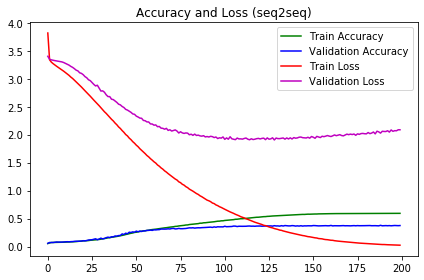

In [23]:
from sklearn.model_selection import train_test_split

report_dir_path = './reports'
model_dir_path = './models'

if not os.path.exists(report_dir_path):
    os.mkdir(report_dir_path)
    
if not os.path.exists(model_dir_path):
    os.mkdir(model_dir_path)

summarizer = Seq2SeqSummarizer(config)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)

print('training size: ', len(Xtrain))
print('testing size: ', len(Xtest))

print('start fitting ...')
history = summarizer.fit(Xtrain, Ytrain, Xtest, Ytest, epochs=200)

history_plot_file_path = report_dir_path + '/' + Seq2SeqSummarizer.model_name + '-history.png'
plot_and_save_history(history, summarizer.model_name, history_plot_file_path, metrics={'loss', 'acc'})

# 進行預測

In [28]:
import numpy as np

model_dir_path = './models'
config = np.load(Seq2SeqSummarizer.get_config_file_path(model_dir_path=model_dir_path), allow_pickle=True).item()

summarizer = Seq2SeqSummarizer(config)
summarizer.load_weights(weight_file_path=Seq2SeqSummarizer.get_weight_file_path(model_dir_path=model_dir_path))

### 多句預測
* #### 記得文本內的句子一定都要先進行斷詞才可以進行預測

In [29]:
print('start predicting ...')
for i in np.random.permutation(np.arange(len(X)))[0:10]:
    x = X[i]
    actual_response = Y[i]
    response = summarizer.summarize(x)
    print('使用者說的話: ', x)
    print('聊天機器人的回應: ', response)
    print('文本內正確的回應: ', actual_response)
    print('='*100, '\n')

start predicting ...
使用者說的話:  我 的 朋友 約 我 之後去 日本 玩
聊天機器人的回應:  是 要 去 哪 一個 地區 呢 ?
文本內正確的回應:  是 要 去 哪 一個 地區 呢 ?

使用者說的話:  天氣 好 冷
聊天機器人的回應:  那要 多 穿衣服 喔 需要 幫 你 開暖 氣機 或 電暖爐 嗎
文本內正確的回應:  多 穿 一點 保暖 衣物 吧

使用者說的話:  我 胃口 不好
聊天機器人的回應:  可以 嘗試些 酸酸甜甜 的 料理 喔
文本內正確的回應:  可以 嘗試些 酸酸甜甜 的 料理 喔

使用者說的話:  我 不 太 舒服
聊天機器人的回應:  需要 聯絡 家人 嗎
文本內正確的回應:  需要 聯絡 家人 嗎

使用者說的話:  可以 幫 我 記住 出去玩 得 時間 嗎 ?
聊天機器人的回應:  當然 可以
文本內正確的回應:  當然 可以

使用者說的話:  我要 去 北海道 玩
聊天機器人的回應:  可以 看到 小樽運河 但是 那裡 天氣 比較 冷要 注意 保暖
文本內正確的回應:  可以 看到 小樽運河 但是 那裡 天氣 比較 冷要 注意 保暖

使用者說的話:  隨便 吃 吃
聊天機器人的回應:  好 的 記得 吃 營養 一點 喔
文本內正確的回應:  好 的 記得 吃 營養 一點 喔

使用者說的話:  我 沒 胃口
聊天機器人的回應:  可以 去 找 一些 聊聊天
文本內正確的回應:  可以 喝點 牛奶 或 著燕麥 補充 營養 喔

使用者說的話:  我種 的 植物 被 亂 剪
聊天機器人的回應:  那個 人 一定 是 不 甘心 你種 的 那麼 漂亮
文本內正確的回應:  那個 人 一定 是 不 甘心 你種 的 那麼 漂亮

使用者說的話:  我 放心不下 我 的 寵物
聊天機器人的回應:  相信 你 一定 可以 中獎 的
文本內正確的回應:  你 擁有 一顆 愛動物 的 心 你 的 寵物 知道 了 一定 很 開心



### 單句預測
* #### 記得句子一定要先進行斷詞才可以進行預測

In [30]:
import jieba

def segment_one_sentence(sentence):
    sentence = sentence.strip()
    seg_list = jieba.cut(sentence)

    segments = ''
    for word in seg_list:
        segments = segments + ' ' + word
        
    return segments

In [32]:
input_X = '我回來了'
input_X = segment_one_sentence(input_X)

print('使用者說的話:', input_X)
print('聊天機器人的回應:', summarizer.summarize(input_X))

使用者說的話:  我 回來 了
聊天機器人的回應: 歡迎 回家 今天 有 發生 什麼 事 嗎
